In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
from datetime import datetime

jtplot.style(theme='monokai', context='talk', fscale=1.4, ticks=True, grid=False, figsize=(6, 4.5), gridlines='--')

In [22]:
df = pd.read_csv('database.csv')

In [23]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

In [25]:
df['city, state'] = df['city'] + ', ' + df['state']

In [26]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,"city, state"
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,"Shelton, WA"
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,"Aloha, OR"
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,"Wichita, KS"
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,"San Francisco, CA"
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,"Evans, CO"


In [27]:
ct = pd.crosstab(df['state'], df['threat_level'])

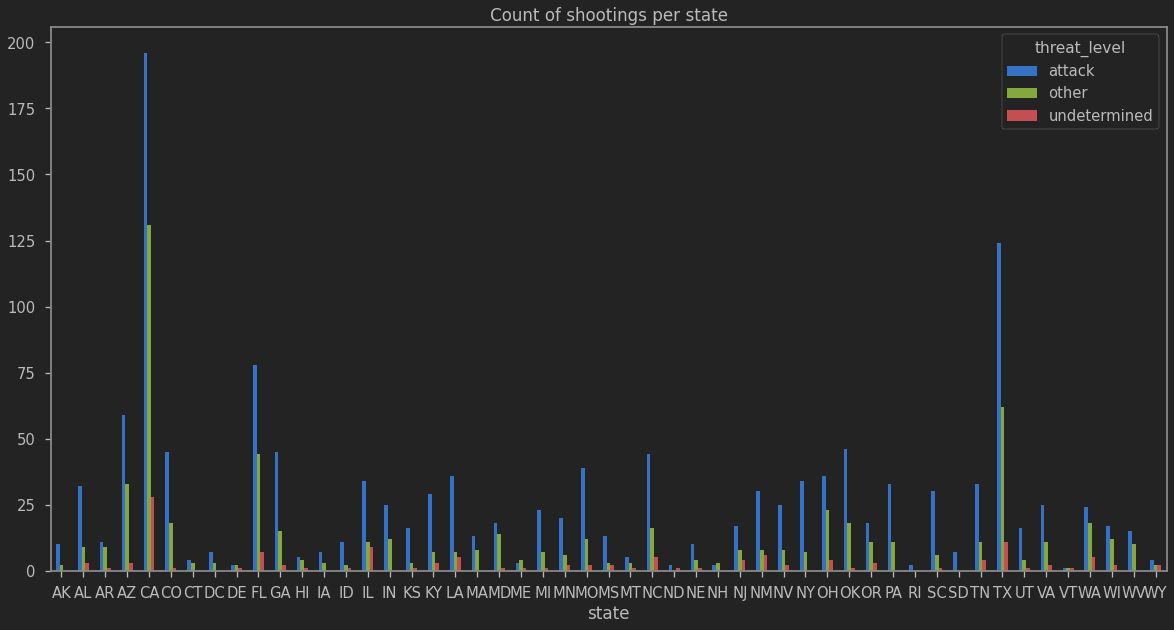

In [28]:
chart_title = 'Count of shootings per state'
ct = pd.crosstab(df['state'], df['threat_level'])


graph = ct.plot.bar(rot = 0, figsize = (20,10), title = chart_title)
fig = plt.gcf()
fig.savefig('shootings per state.png', dpi=100)

In [29]:
df['threat_level'].drop_duplicates()

0           attack
2            other
15    undetermined
Name: threat_level, dtype: object

In [30]:
count_series = df.groupby(['city', 'state', 'threat_level']).size()
summarydf = count_series.to_frame(name = 'count').reset_index()
texasdf = summarydf.loc[(summarydf['state'] == 'TX')]

In [31]:
print(texasdf.loc[texasdf['count'] >= 3])


             city state threat_level  count
76         Austin    TX       attack     11
77         Austin    TX        other      3
343        Dallas    TX       attack      5
419       El Paso    TX       attack      3
420       El Paso    TX        other      3
497    Fort Worth    TX       attack      5
644       Houston    TX       attack     16
645       Houston    TX        other      7
1009       Odessa    TX       attack      3
1223  San Antonio    TX       attack      8
1224  San Antonio    TX        other      7
1473  Weatherford    TX        other      3


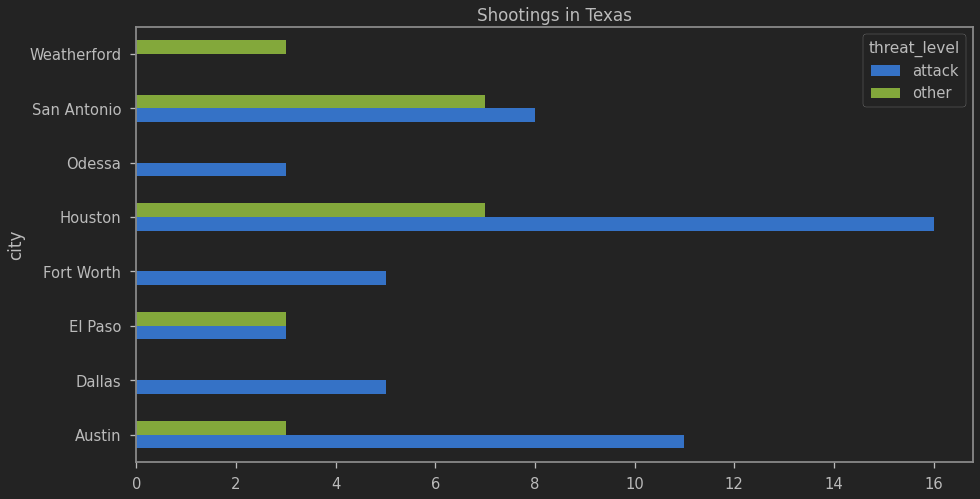

In [32]:
chart_title = 'Shootings in Texas'
texasdf = texasdf.loc[texasdf['count'] >= 3]
#texasdf = summarydf.loc[(summarydf['state'] == 'TX') & (summarydf['city'].count() > 5)]
ct = pd.crosstab(texasdf['city'], texasdf['threat_level'], values = texasdf['count'], aggfunc = 'sum')

graph = ct.plot.barh(rot = 0, figsize = (15,8), title = chart_title)
#graph.set_xticklabels(df['Names'], rotation=90, ha='right')
#plt.xticks(rotation=90)


fig = plt.gcf()
fig.savefig('shootings in Texas.png', dpi=100)

In [33]:
count_series = df.groupby(['city', 'state', 'armed']).size()
summarydf = count_series.to_frame(name = 'count').reset_index()
armed_cadf = summarydf.loc[(summarydf['state'] == 'CA')]

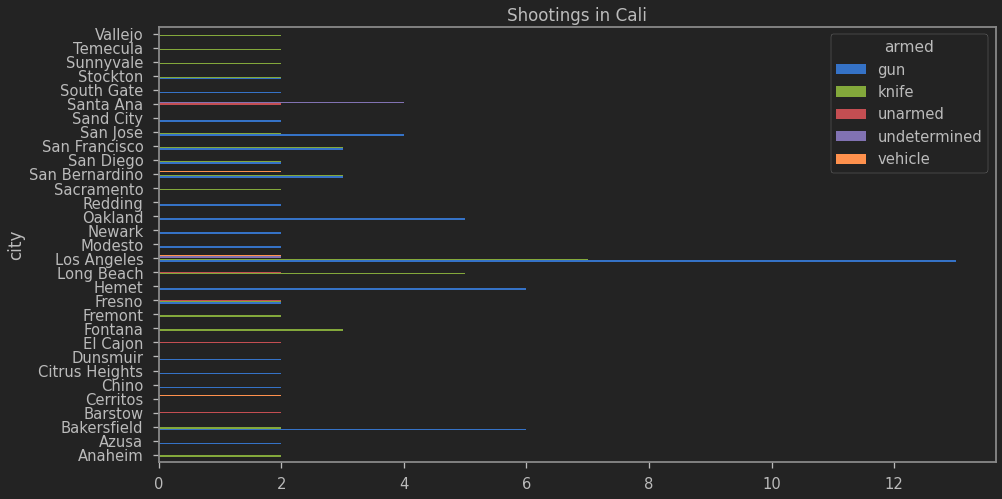

In [34]:
chart_title = 'Shootings in Cali'
armed_cadf = armed_cadf.loc[armed_cadf['count'] >=2 ]
#texasdf = summarydf.loc[(summarydf['state'] == 'TX') & (summarydf['city'].count() > 5)]
ct = pd.crosstab(armed_cadf['city'], armed_cadf['armed'], values = armed_cadf['count'], aggfunc = 'sum')

graph = ct.plot.barh(rot = 0, figsize = (15,8), title = chart_title)
#graph.set_xticklabels(df['Names'], rotation=90, ha='right')
#plt.xticks(rotation=90)


fig = plt.gcf()
fig.savefig('shootings in cali.png', dpi=100)

In [35]:
armed_cadf['armed'].drop_duplicates().to_list()

['knife', 'gun', 'unarmed', 'vehicle', 'undetermined']

In [36]:
mask = ['screwdriver', 'knife', 'unarmed', 'vehicle', 'carjack', 'toy weapon', 'hatchet','undetermined',
 'hand torch','flashlight','bayonet','gun and knife','metal pipe','pipe','hammer','baseball bat','ax','Taser','bean-bag gun',
 'box cutter',"contractor's level",'spear','beer bottle','metal hand tool','unknown weapon','chain',
 'sword','scissors','meat cleaver','metal rake','crossbow','garden tool','machete','metal stick','hatchet and gun']

In [37]:
armed_cadf_2 = armed_cadf.loc[armed_cadf['city'] == 'Oakland']
ct = pd.crosstab(armed_cadf_2['city'], armed_cadf_2['armed'], values = armed_cadf_2['count'], aggfunc = 'sum')

In [38]:
ct

armed,gun
city,
Oakland,5


In [39]:
count_series = df.groupby(['city', 'state', 'city, state', 'armed']).size()
summarydf = count_series.to_frame(name = 'count').reset_index()

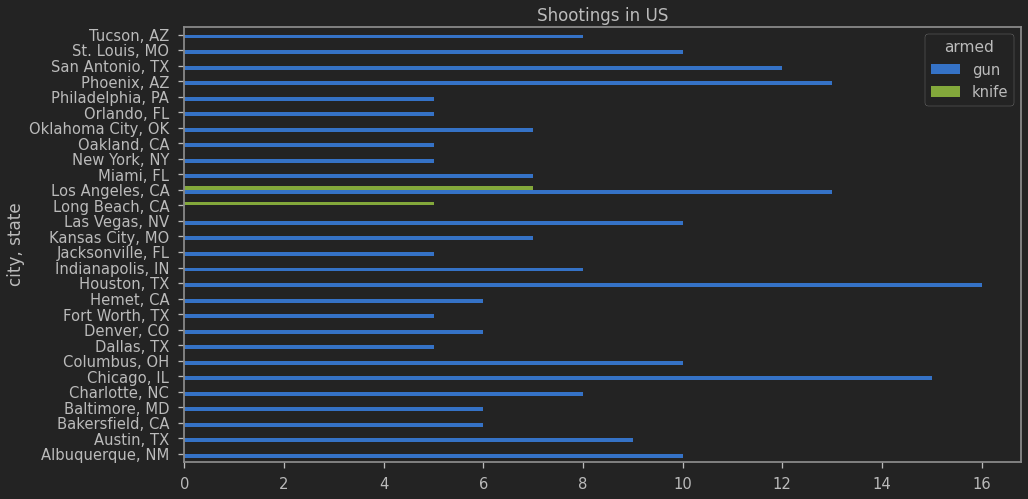

In [40]:
chart_title = 'Shootings in US'
summarydf = summarydf.loc[summarydf['count'] >=5 ]
#texasdf = summarydf.loc[(summarydf['state'] == 'TX') & (summarydf['city'].count() > 5)]
ct = pd.crosstab(summarydf['city, state'], summarydf['armed'], values = summarydf['count'], aggfunc = 'sum')

graph = ct.plot.barh(rot = 0, figsize = (15,8), title = chart_title)
#graph.set_xticklabels(df['Names'], rotation=90, ha='right')
#plt.xticks(rotation=45)


fig = plt.gcf()
fig.savefig('US Shootings >= 5.png', dpi=100)